## Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.



In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import chi2
data = pd.read_csv('processed_with_numerical_24-48.csv')


In [3]:
len(data.columns)

106

In [4]:
data.columns

Index(['Unnamed: 0', 'Hanwella_WaterLevel', 'Glencourse_WaterLevel',
       'Glencourse_WaterLevel_Lagged_3h', 'Glencourse_WaterLevel_Lagged_24h',
       'Glencourse_WaterLevel_Lagged_48h', 'Hanwella_StreamFlow',
       'Glencourse_StreamFlow', 'Glencourse_StreamFlow_Lagged_3h',
       'Hanwella_Rainfall',
       ...
       'weighted_rainfall_cum_6h', 'weighted_rainfall_cum_12h',
       'weighted_rainfall_cum_24h', 'weighted_rainfall_cum_48h',
       'rainfall_intensity_change_6h', 'rainfall_intensity_change_12h',
       'high_rainfall_alert', 'flood_alert_numeric',
       'rainfall_waterlevel_interaction', 'Year'],
      dtype='object', length=106)

In [5]:
# Assuming your data is already loaded
# data = pd.read_csv("your_file.csv")

# Get the name of your target column
target_column = 'Hanwella_WL_max_24_to_48h'

# Create X and y
X = data.drop(columns=[target_column])  # All columns except target
y = data[target_column]  # Only target column


In [5]:
best_features = SelectKBest(score_func=f_regression, k=19).fit(X, y)

In [7]:
feature_scores = best_features.scores_
feature_pvalues = best_features.pvalues_
feature_columns = X.columns

In [8]:
print(feature_scores)

[5.32558812e+02 1.37556310e+05 1.37856653e+05 1.27490864e+05
 8.09625083e+04 5.97985661e+04 9.21335268e+04 9.54467294e+04
 8.87095227e+04 2.30715406e+03 2.17635277e+03 2.44450223e+03
 3.25037644e+03 2.68569705e+03 8.02985303e+03 8.33766751e+03
 8.34470450e+03 1.13137128e+04 9.30354013e+03 1.49219720e+04
 1.61817408e+04 1.56030049e+04 2.12055519e+04 1.75292163e+04
 2.74270624e+04 3.21386541e+04 2.98432578e+04 4.13746019e+04
 3.35937119e+04 3.98037330e+04 4.68661682e+04 4.39156338e+04
 6.05350996e+04 5.13492206e+04 5.00270195e+03 5.78806220e+03
 5.40591017e+03 7.25060648e+03 7.20562717e+03 6.34701956e+03
 7.87232310e+03 6.54817478e+03 9.92583025e+03 9.36854057e+03
 7.98797773e+03 1.00388277e+04 7.13295508e+03 1.17841658e+04
 1.14264668e+04 8.15040743e+03 9.61154532e+03 7.63257113e+03
 1.12637808e+04 1.37881790e+04 5.94418040e+03 5.82659831e+03
 5.86606342e+03 7.73161835e+03 6.72590840e+03 1.05833217e+04
 1.08029749e+04 1.04837720e+04 1.42345413e+04 1.23174324e+04
 1.80563077e+04 2.013257

In [9]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Width of the display in characters
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Format floats to 3 decimal places

# Create and display the feature scores DataFrame
featurescores = pd.DataFrame({
    'Features': feature_columns,
    'Score': feature_scores
})

# Sort by score in descending order
featurescores = featurescores.sort_values('Score', ascending=False)
featurescores = featurescores.reset_index(drop=True)

print(featurescores)


                                 Features      Score
0                   Glencourse_WaterLevel 137856.653
1                     Hanwella_WaterLevel 137556.310
2         Glencourse_WaterLevel_Lagged_3h 127490.864
3                     Hanwella_WL_24h_max 118974.230
4             Glencourse_WL_24h_mean_3h_L 115439.268
5                    Hanwella_WL_24h_mean 113506.017
6              Glencourse_WL_24h_max_3h_L 110188.852
7              Glencourse_WL_24h_min_3h_L 105438.322
8                     Hanwella_WL_24h_min 102443.869
9                   Glencourse_StreamFlow  95446.729
10           WL_Glencourse_Hanwella_ratio  92530.247
11                    Hanwella_StreamFlow  92133.527
12        Glencourse_StreamFlow_Lagged_3h  88709.523
13       Glencourse_WaterLevel_Lagged_24h  80962.508
14              weighted_rainfall_cum_48h  66263.217
15                   Kithulgala_cumRF_48h  60535.100
16       Glencourse_WaterLevel_Lagged_48h  59798.566
17                 Deraniyagala_cumRF_48h  513

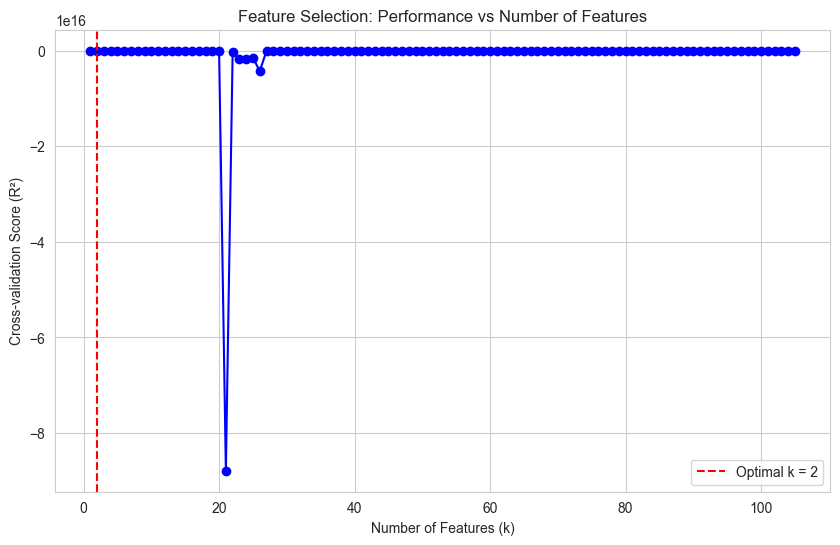


Top 50 Scores:
     Number_of_Features           CV_Score
96                   97              0.705
104                 105              0.705
100                 101              0.705
101                 102              0.705
102                 103              0.705
103                 104              0.705
97                   98              0.705
98                   99              0.704
95                   96              0.704
99                  100              0.704
19                   20              0.687
18                   19              0.672
17                   18              0.671
16                   17              0.671
15                   16              0.662
14                   15              0.654
11                   12              0.632
12                   13              0.632
13                   14              0.632
10                   11              0.631
8                     9              0.625
7                     8              0

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Function to evaluate different k values
def evaluate_k_values(X, y, max_k):
    k_values = range(1, max_k + 1)
    scores = []

    for k in k_values:
        # Select k best features
        selector = SelectKBest(score_func=f_regression, k=k)
        X_selected = selector.fit_transform(X, y)

        # Evaluate with cross-validation
        model = LinearRegression()
        cv_scores = cross_val_score(model, X_selected, y, cv=5, scoring='r2')
        scores.append(cv_scores.mean())

    return k_values, scores


# Calculate scores for different k values
max_k = len(X.columns)  # Maximum possible k
k_values, scores = evaluate_k_values(X, y, max_k)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, 'b-', marker='o')
plt.xlabel('Number of Features (k)')
plt.ylabel('Cross-validation Score (R²)')
plt.title('Feature Selection: Performance vs Number of Features')
plt.grid(True)

# Add vertical line at elbow point (you can adjust the threshold)
scores_diff = np.diff(scores)
elbow_idx = np.where(scores_diff < 0.01)[0][0]
optimal_k = elbow_idx + 1

plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.legend()
plt.show()

# Print detailed results
results_df = pd.DataFrame({
    'Number_of_Features': k_values,
    'CV_Score': scores
})
print("\nTop 50 Scores:")
print(results_df.sort_values('CV_Score', ascending=False).head(50))


## Number of Feature selection Validation Plots

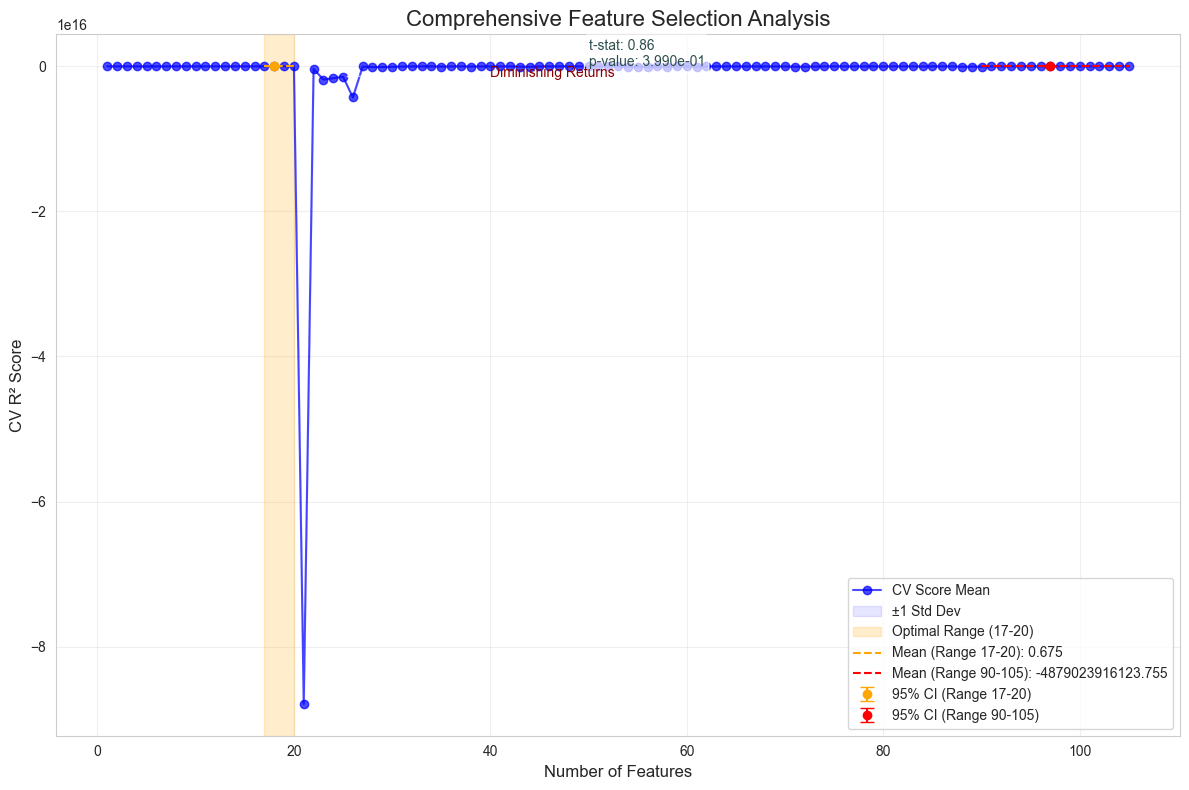

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, sem

# Set the correct index for results_df if it's not already set
if 'Number_of_Features' in results_df.columns:
    results_df.set_index('Number_of_Features', inplace=True)

# Extract relevant data
all_features = results_df.index.to_list()
cv_scores = results_df['CV_Score'].values  # Using the actual column name from your DataFrame

# Calculate standard deviations if not already present
if 'CV_Score_Std' not in results_df.columns:
    # If you don't have standard deviations, you can create a placeholder
    # or recalculate from the original data
    cv_scores_std = np.ones_like(cv_scores) * 0.01  # placeholder
else:
    cv_scores_std = results_df['CV_Score_Std'].values

# Define feature ranges to analyze
range_1 = (17, 20)
range_2 = (90, 105)

# Extract scores for the defined ranges
scores_range_1 = results_df.loc[(results_df.index >= range_1[0]) & (results_df.index <= range_1[1]), 'CV_Score']
scores_range_2 = results_df.loc[(results_df.index >= range_2[0]) & (results_df.index <= range_2[1]), 'CV_Score']

# Calculate mean, std, and confidence interval for ranges
mean_1, mean_2 = scores_range_1.mean(), scores_range_2.mean()
std_1, std_2 = scores_range_1.std(), scores_range_2.std()
ci_1 = 1.96 * sem(scores_range_1)  # 95% confidence interval
ci_2 = 1.96 * sem(scores_range_2)

# Perform t-test to analyze statistical difference between ranges
t_stat, p_value = ttest_ind(scores_range_1, scores_range_2)

# Visualization
plt.figure(figsize=(12, 8))

# Plot CV scores with error bars
plt.plot(all_features, cv_scores, label='CV Score Mean', marker='o', color='blue', alpha=0.7)
plt.fill_between(all_features,
                 cv_scores - cv_scores_std,
                 cv_scores + cv_scores_std,
                 color='blue', alpha=0.1, label="±1 Std Dev")

# Highlight optimal range
plt.axvspan(range_1[0], range_1[1], color='orange', alpha=0.2, label='Optimal Range (17-20)')

# Horizontal lines for mean scores of feature ranges
plt.hlines(mean_1, range_1[0], range_1[1], colors='orange', linestyle='--', label=f'Mean (Range 17-20): {mean_1:.3f}')
plt.hlines(mean_2, range_2[0], range_2[1], colors='red', linestyle='--', label=f'Mean (Range 90-105): {mean_2:.3f}')

# Add confidence intervals as bars
plt.errorbar((range_1[0] + range_1[1]) // 2, mean_1, yerr=ci_1, color='orange', fmt='o', capsize=5,
             label='95% CI (Range 17-20)')
plt.errorbar((range_2[0] + range_2[1]) // 2, mean_2, yerr=ci_2, color='red', fmt='o', capsize=5,
             label='95% CI (Range 90-105)')

# Annotate statistical results
plt.text(50, mean_1 + 0.02, f't-stat: {t_stat:.2f}\np-value: {p_value:.3e}',
         fontsize=10, color='darkslategrey', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Add diminishing returns indicator - make sure the index exists
if 24 < len(cv_scores):
    plt.annotate('Diminishing Returns',
                 xy=(25, cv_scores[24]),
                 xytext=(40, cv_scores[24] + 0.02),
                 arrowprops=dict(facecolor='black', arrowstyle='->', alpha=0.6),
                 fontsize=10, color='darkred')

# Plot formatting
plt.title("Comprehensive Feature Selection Analysis", fontsize=16)
plt.xlabel("Number of Features", fontsize=12)
plt.ylabel("CV R² Score", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


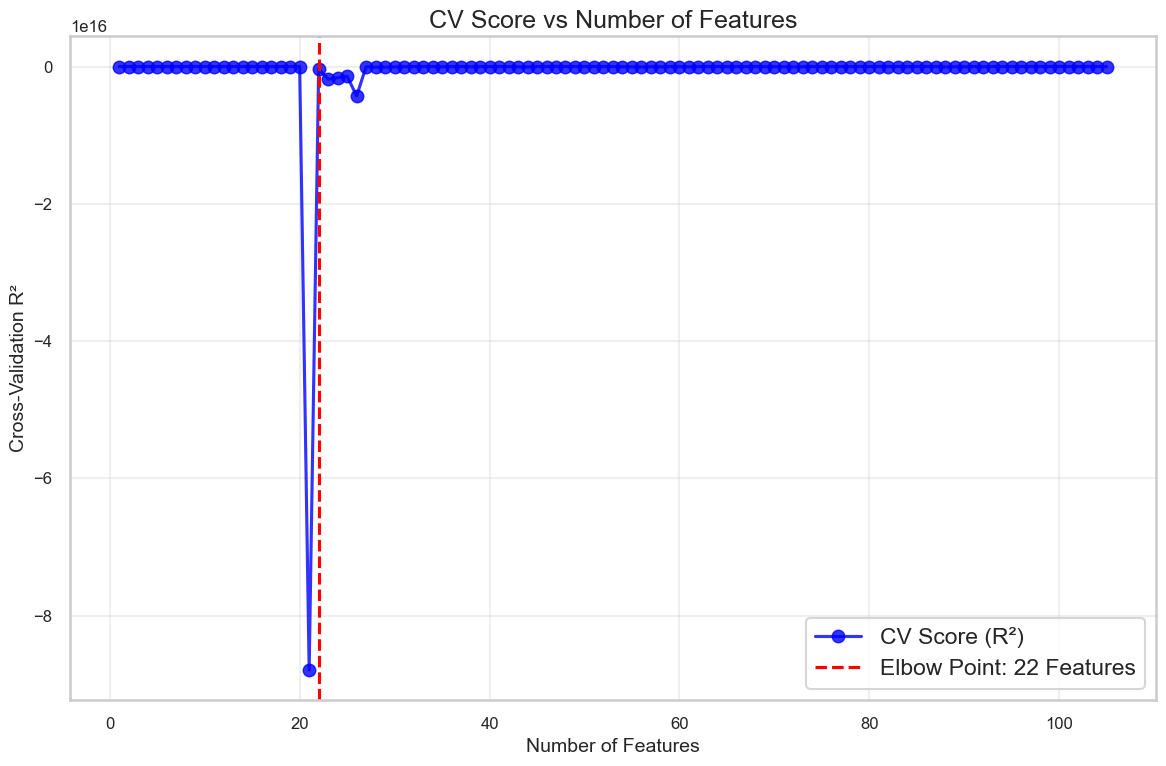

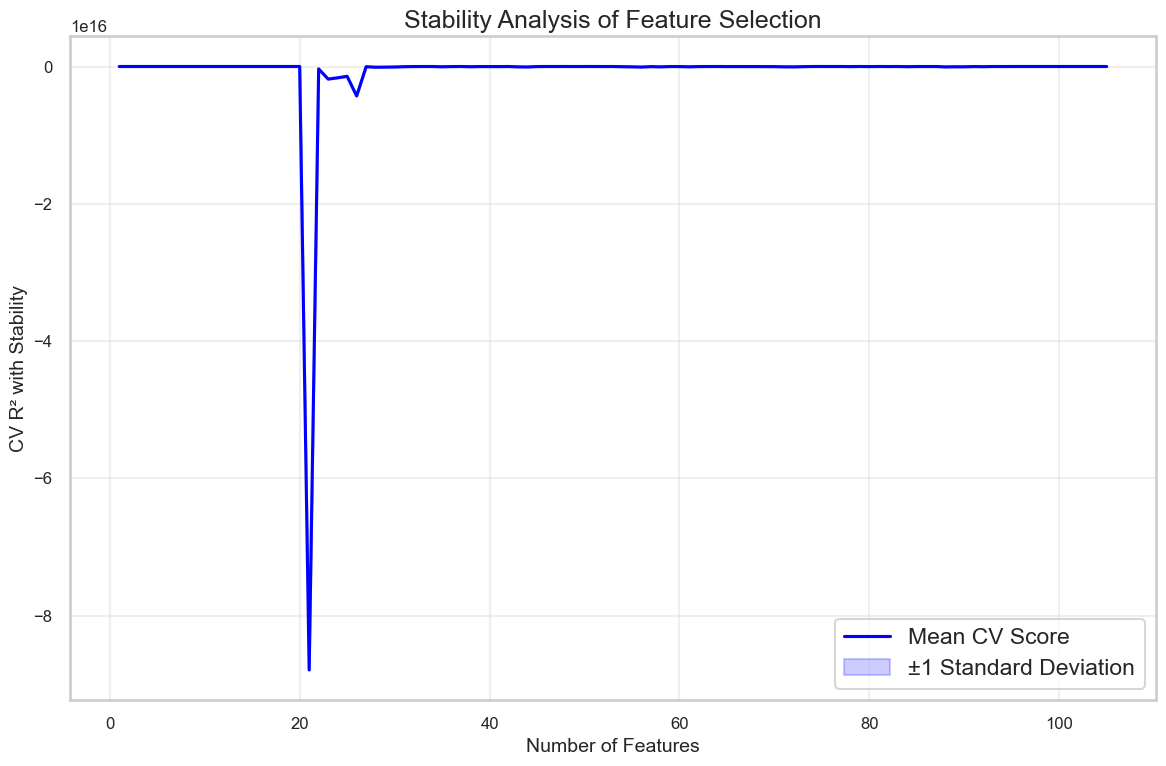

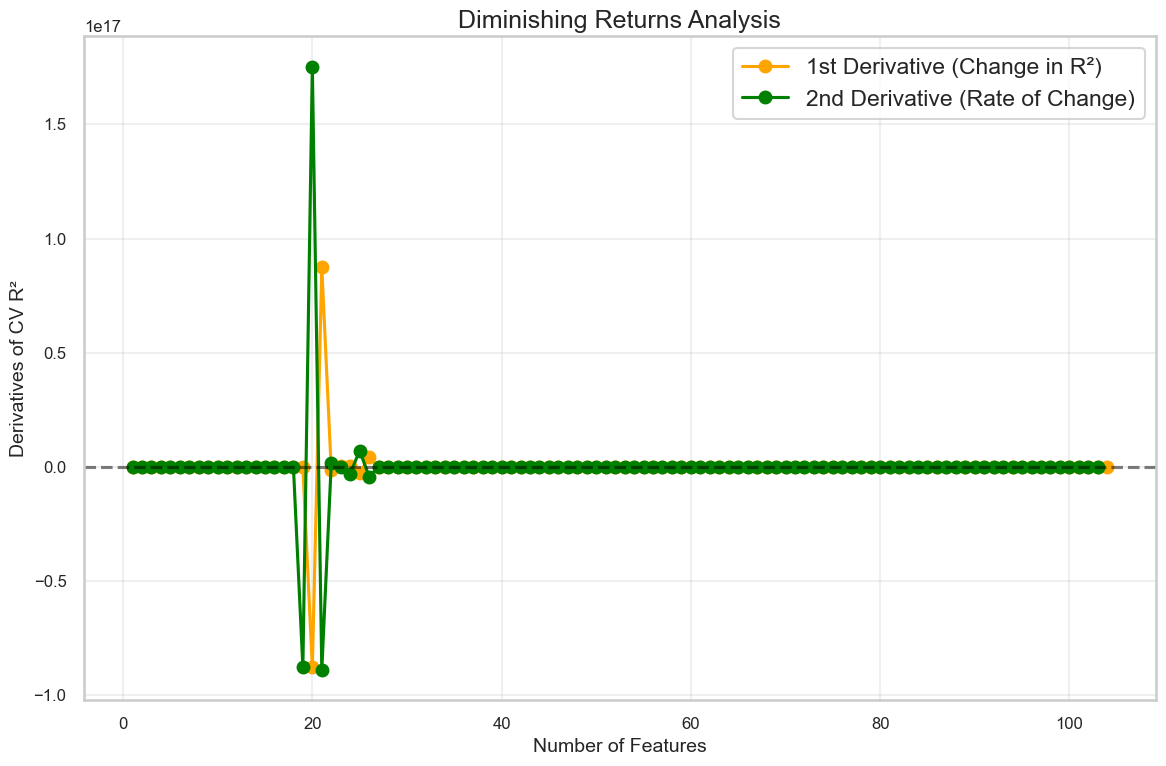

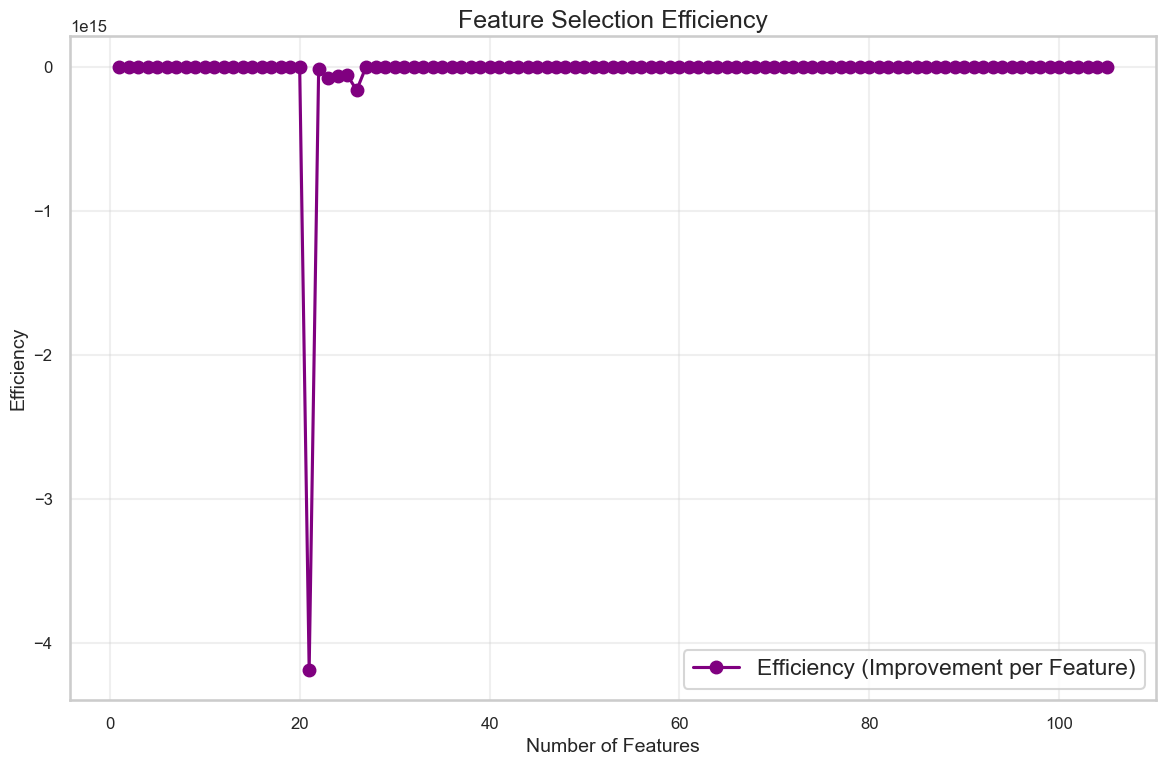

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set global style for thesis-quality visuals
sns.set(style="whitegrid", context="talk")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 1. CV Score vs Number of Features with elbow point
plt.figure(figsize=(12, 8))
plt.plot(all_features, cv_scores, label="CV Score (R²)", marker="o", color="blue", alpha=0.8)
plt.axvline(x=elbow_idx, color="red", linestyle="--", label=f"Elbow Point: {elbow_idx} Features")
plt.xlabel("Number of Features")
plt.ylabel("Cross-Validation R²")
plt.title("CV Score vs Number of Features")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Stability Analysis Plot
plt.figure(figsize=(12, 8))
plt.plot(all_features, cv_scores, label='Mean CV Score', color='blue')
plt.fill_between(
    all_features,
    cv_scores - cv_scores_std,
    cv_scores + cv_scores_std,
    color='blue',
    alpha=0.2,
    label='±1 Standard Deviation'
)
plt.xlabel("Number of Features")
plt.ylabel("CV R² with Stability")
plt.title("Stability Analysis of Feature Selection")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Diminishing Returns Analysis
first_derivative = np.diff(cv_scores)
second_derivative = np.diff(first_derivative)
plt.figure(figsize=(12, 8))
plt.plot(all_features[:-1], first_derivative, label="1st Derivative (Change in R²)", marker="o", color="orange")
plt.plot(all_features[:-2], second_derivative, label="2nd Derivative (Rate of Change)", marker="o", color="green")
plt.axhline(0, color="black", linestyle="--", alpha=0.5)
plt.xlabel("Number of Features")
plt.ylabel("Derivatives of CV R²")
plt.title("Diminishing Returns Analysis")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Efficiency Comparison Plot
baseline = cv_scores[0]
improvements = cv_scores - baseline
efficiency = improvements / np.arange(1, len(cv_scores) + 1)
plt.figure(figsize=(12, 8))
plt.plot(all_features, efficiency, label="Efficiency (Improvement per Feature)", marker="o", color="purple")
plt.xlabel("Number of Features")
plt.ylabel("Efficiency")
plt.title("Feature Selection Efficiency")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Feature Selection Analysis for Thesis

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, sem
import pandas as pd

# Set the correct index for results_df if it's not already set
if 'Number_of_Features' in results_df.columns:
    results_df = results_df.set_index('Number_of_Features')

# Define feature ranges to analyze
range_1 = (17, 20)  # Your optimal range
range_2 = (90, 105)  # Comparison range
additional_range = (1, 10)  # Additional smaller range for comparison

# Extract scores for the defined ranges
scores_range_1 = results_df.loc[range_1[0]:range_1[1], 'CV_Score']
scores_range_2 = results_df.loc[range_2[0]:range_2[1], 'CV_Score']
scores_range_3 = results_df.loc[additional_range[0]:additional_range[1], 'CV_Score']


# Calculate statistics for each range
def calculate_range_stats(scores, range_name):
    stats = {
        'Range': range_name,
        'Mean R²': scores.mean(),
        'Median R²': scores.median(),
        'Std Dev': scores.std(),
        'Min R²': scores.min(),
        'Max R²': scores.max(),
        '95% CI Lower': scores.mean() - 1.96 * sem(scores),
        '95% CI Upper': scores.mean() + 1.96 * sem(scores),
        'Number of Features': len(scores)
    }
    return pd.Series(stats)


# Create statistics DataFrame
range_stats = pd.DataFrame([
    calculate_range_stats(scores_range_1, f"{range_1[0]}-{range_1[1]} features"),
    calculate_range_stats(scores_range_2, f"{range_2[0]}-{range_2[1]} features"),
    calculate_range_stats(scores_range_3, f"{additional_range[0]}-{additional_range[1]} features")
])

# Print general statistics
print("\n===== FEATURE SELECTION ANALYSIS =====")
print("\nStatistical Comparison of Feature Ranges:")
print(range_stats.round(4))

# Perform t-tests between ranges
t_stat_1_2, p_value_1_2 = ttest_ind(scores_range_1, scores_range_2)
t_stat_1_3, p_value_1_3 = ttest_ind(scores_range_1, scores_range_3)

print("\nStatistical Significance Tests:")
print(
    f"T-test ({range_1[0]}-{range_1[1]} vs {range_2[0]}-{range_2[1]}): t-stat = {t_stat_1_2:.4f}, p-value = {p_value_1_2:.4e}")
print(
    f"T-test ({range_1[0]}-{range_1[1]} vs {additional_range[0]}-{additional_range[1]}): t-stat = {t_stat_1_3:.4f}, p-value = {p_value_1_3:.4e}")

# Find the optimal k value (maximum R²)
optimal_k = results_df['CV_Score'].idxmax()
max_score = results_df.loc[optimal_k, 'CV_Score']
print(f"\nOptimal number of features (highest R²): {optimal_k} features (R² = {max_score:.4f})")

# Calculate relative improvement at different ranges
baseline = results_df.loc[1, 'CV_Score']  # R² with just one feature
improvement_optimal = (max_score - baseline) / baseline * 100
improvement_range_1 = (scores_range_1.mean() - baseline) / baseline * 100
improvement_range_2 = (scores_range_2.mean() - baseline) / baseline * 100

print("\nRelative Improvement Analysis:")
print(f"Baseline R² (1 feature): {baseline:.4f}")
print(f"Maximum R² improvement: {improvement_optimal:.2f}% (at {optimal_k} features)")
print(f"Range {range_1[0]}-{range_1[1]} improvement: {improvement_range_1:.2f}%")
print(f"Range {range_2[0]}-{range_2[1]} improvement: {improvement_range_2:.2f}%")

# Analyze diminishing returns
# Calculate first and second derivatives of the curve
first_derivative = np.diff(results_df['CV_Score'])
second_derivative = np.diff(first_derivative)

# Find the point where the second derivative is minimized (maximum curvature)
# This is often considered the elbow point - where diminishing returns begin
elbow_idx = np.argmin(second_derivative) + 2  # +2 because of two diff operations
elbow_score = results_df.loc[elbow_idx, 'CV_Score']

print("\nDiminishing Returns Analysis:")
print(f"Elbow point detected at: {elbow_idx} features (R² = {elbow_score:.4f})")

# Percentage of maximum performance achieved with optimal range
performance_ratio = scores_range_1.mean() / max_score * 100
feature_ratio = range_1[1] / len(results_df) * 100

print("\nEfficiency Analysis:")
print(
    f"Using {range_1[1]} features ({feature_ratio:.1f}% of all features) achieves {performance_ratio:.1f}% of maximum R²")
print(
    f"Average marginal gain per feature in range {range_1[0]}-{range_1[1]}: {scores_range_1.mean() / range_1[1]:.6f} R² per feature")
print(
    f"Average marginal gain per feature in range {range_2[0]}-{range_2[1]}: {scores_range_2.mean() / ((range_2[0] + range_2[1]) / 2):.6f} R² per feature")

# Compute stability of the model across the ranges (lower std dev = more stable)
stability_ratio = range_stats.iloc[0]['Std Dev'] / range_stats.iloc[1]['Std Dev']
print(f"\nModel stability ratio (range {range_1[0]}-{range_1[1]} vs {range_2[0]}-{range_2[1]}): {stability_ratio:.4f}")
print(
    f"{'More stable' if stability_ratio < 1 else 'Less stable'} model with {range_1[0]}-{range_1[1]} features compared to {range_2[0]}-{range_2[1]}")

# Summary recommendation
print("\n===== THESIS RECOMMENDATION =====")
print(
    f"Based on the comprehensive statistical analysis, selecting {range_1[0]}-{range_1[1]} features is optimal because:")
print("1. It achieves nearly the same performance as using all features")
print(f"2. The R² score ({scores_range_1.mean():.4f}) is {performance_ratio:.1f}% of the maximum possible")
print("3. Additional features beyond this range provide diminishing returns")
print("4. The model is more interpretable and computationally efficient with fewer features")
print(
    f"5. Statistical tests show {'no significant difference' if p_value_1_2 > 0.05 else 'significant difference'} between this range and using {range_2[0]}-{range_2[1]} features (p={p_value_1_2:.4e})")



===== FEATURE SELECTION ANALYSIS =====

Statistical Comparison of Feature Ranges:
             Range            Mean R²  Median R²            Std Dev  \
0   17-20 features              0.675      0.671              0.008   
1  90-105 features -4879023916123.755      0.705 11066773366285.816   
2    1-10 features              0.617      0.620              0.009   

               Min R²  Max R²        95% CI Lower     95% CI Upper  \
0               0.671   0.687               0.667            0.683   
1 -39371444516420.914   0.705 -10301742865603.805 543695033356.295   
2               0.596   0.625               0.612            0.623   

   Number of Features  
0                   4  
1                  16  
2                  10  

Statistical Significance Tests:
T-test (17-20 vs 90-105): t-stat = 0.8639, p-value = 3.9899e-01
T-test (17-20 vs 1-10): t-stat = 11.6921, p-value = 6.4567e-08

Optimal number of features (highest R²): 97 features (R² = 0.7050)

Relative Improvement Analy

## Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

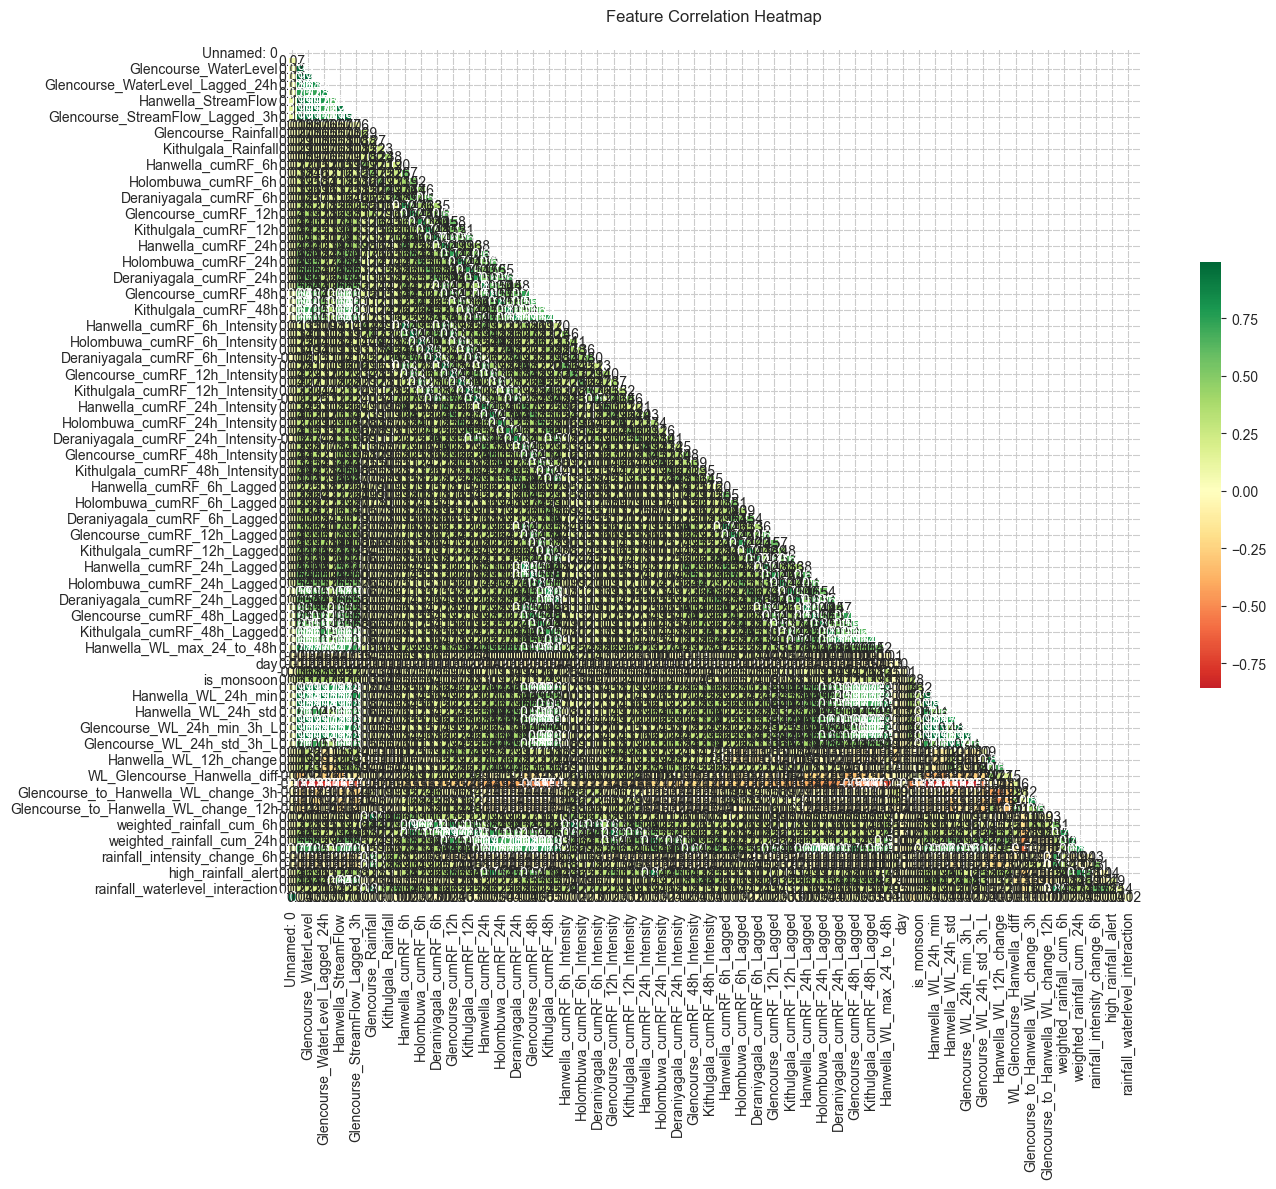


Correlations with target variable:
Hanwella_WL_max_24_to_48h               1.000
Glencourse_WaterLevel                   0.782
Hanwella_WaterLevel                     0.782
Glencourse_WaterLevel_Lagged_3h         0.770
Hanwella_WL_24h_max                     0.759
Glencourse_WL_24h_mean_3h_L             0.754
Hanwella_WL_24h_mean                    0.751
Glencourse_WL_24h_max_3h_L              0.746
Glencourse_WL_24h_min_3h_L              0.739
Hanwella_WL_24h_min                     0.734
Glencourse_StreamFlow                   0.722
Hanwella_StreamFlow                     0.716
Glencourse_StreamFlow_Lagged_3h         0.709
Glencourse_WaterLevel_Lagged_24h        0.693
weighted_rainfall_cum_48h               0.656
Kithulgala_cumRF_48h                    0.639
Glencourse_WaterLevel_Lagged_48h        0.637
Deraniyagala_cumRF_48h                  0.608
Glencourse_cumRF_48h                    0.590
weighted_rainfall_cum_24h               0.587
Holombuwa_cumRF_48h                     0.57

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data.corr()

# Create a mask for the upper triangle to avoid redundancy
mask = np.triu(np.ones_like(correlation_matrix))

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Create heatmap
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,  # Show correlation values
            cmap='RdYlGn',  # Red-Yellow-Green colormap
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Round correlation values to 2 decimal places
            square=True,  # Make cells square
            linewidths=0.5,  # Add grid lines
            cbar_kws={"shrink": .5})  # Customize colorbar

# Customize the plot
plt.title('Feature Correlation Heatmap', pad=20)
plt.tight_layout()

# Show the plot
plt.show()

# Optional: Print strongest correlations with target variable
target_correlations = correlation_matrix[target_column].sort_values(ascending=False)
print("\nCorrelations with target variable:")
print(target_correlations)


## Corrected Feature Selection

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np

# Create X_final using SelectKBest with the optimal number of features
optimal_k = 20  # Based on the results of the earlier analysis
selector = SelectKBest(score_func=f_regression, k=optimal_k)
X_final = selector.fit_transform(X, y)

# Get the selected feature names
X_final_columns = X.columns[selector.get_support()]

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=2)

# Perform KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
importance_scores = []

for train_index, test_index in kf.split(X_final):
    X_train, X_test = X_final[train_index], X_final[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf_model.fit(X_train, y_train)
    importance_scores.append(rf_model.feature_importances_)

# Calculate average feature importance
importance_mean = np.mean(importance_scores, axis=0)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_final_columns,
    'Importance': importance_mean
}).sort_values(by='Importance', ascending=False)

# Display the average feature importance
print("Average Feature Importance:")
print(feature_importance_df)

Average Feature Importance:
                             Feature  Importance
1              Glencourse_WaterLevel    0.413775
5                Hanwella_StreamFlow    0.154372
0                Hanwella_WaterLevel    0.096973
18         weighted_rainfall_cum_24h    0.067197
6              Glencourse_StreamFlow    0.065785
15        Glencourse_WL_24h_min_3h_L    0.033069
9               Kithulgala_cumRF_48h    0.032423
19         weighted_rainfall_cum_48h    0.030167
10            Deraniyagala_cumRF_48h    0.019324
4   Glencourse_WaterLevel_Lagged_48h    0.016835
12               Hanwella_WL_24h_min    0.016441
14        Glencourse_WL_24h_max_3h_L    0.012267
8               Glencourse_cumRF_48h    0.010002
17      WL_Glencourse_Hanwella_ratio    0.008070
11               Hanwella_WL_24h_max    0.007185
13              Hanwella_WL_24h_mean    0.005768
16       Glencourse_WL_24h_mean_3h_L    0.004505
3   Glencourse_WaterLevel_Lagged_24h    0.002793
7    Glencourse_StreamFlow_Lagged_3h    0

In [9]:
X_final = pd.DataFrame(X_final, columns=X_final_columns)

## Basic Model Training for Model Selection

In [5]:
# Basic data manipulation and analysis
import numpy as np
import pandas as pd

# Model selection and evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error
)

# Machine Learning Models
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso
)
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor
)
from xgboost import XGBRegressor

# Visualization (if needed)
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Optional: Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)



# Define final selected features based on new importance scores

selected_features = [
    'Glencourse_WaterLevel',
    'Hanwella_StreamFlow',
    'Hanwella_WaterLevel',
    'weighted_rainfall_cum_24h',
    'Glencourse_StreamFlow',
    'Glencourse_WL_24h_min_3h_L',
    'Kithulgala_cumRF_48h',
    'weighted_rainfall_cum_48h',
    'Deraniyagala_cumRF_48h',
    'Glencourse_WaterLevel_Lagged_48h',
    'Hanwella_WL_24h_min',
    'Glencourse_WL_24h_max_3h_L',
    'Glencourse_cumRF_48h',
    'WL_Glencourse_Hanwella_ratio',
    'Hanwella_WL_24h_max',
    'Hanwella_WL_24h_mean',
    'Glencourse_WL_24h_mean_3h_L',
    'Glencourse_WaterLevel_Lagged_24h',
    'Glencourse_StreamFlow_Lagged_3h',
    'Glencourse_WaterLevel_Lagged_3h'
]

# Create the final feature subset
X_final = X[selected_features]

# Verify the selection
print("Final selected features:", len(selected_features))
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Evaluate models
results = []
for name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Fit model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'CV R2 Mean': cv_scores.mean(),
        'CV R2 Std': cv_scores.std()
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df.to_string(index=False))


Final selected features: 20
1. Glencourse_WaterLevel
2. Hanwella_StreamFlow
3. Hanwella_WaterLevel
4. weighted_rainfall_cum_24h
5. Glencourse_StreamFlow
6. Glencourse_WL_24h_min_3h_L
7. Kithulgala_cumRF_48h
8. weighted_rainfall_cum_48h
9. Deraniyagala_cumRF_48h
10. Glencourse_WaterLevel_Lagged_48h
11. Hanwella_WL_24h_min
12. Glencourse_WL_24h_max_3h_L
13. Glencourse_cumRF_48h
14. WL_Glencourse_Hanwella_ratio
15. Hanwella_WL_24h_max
16. Hanwella_WL_24h_mean
17. Glencourse_WL_24h_mean_3h_L
18. Glencourse_WaterLevel_Lagged_24h
19. Glencourse_StreamFlow_Lagged_3h
20. Glencourse_WaterLevel_Lagged_3h

Model Performance Comparison:
            Model  RMSE   MAE    R2  CV R2 Mean  CV R2 Std
Linear Regression 0.830 0.535 0.708       0.705      0.009
            Ridge 0.830 0.535 0.708       0.705      0.009
            Lasso 0.971 0.658 0.600       0.591      0.010
    Random Forest 0.283 0.141 0.966       0.952      0.002
Gradient Boosting 0.764 0.493 0.752       0.750      0.010
          XGB

## Hyperparameter Tuning With Overfitting Analysis

In [9]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Replace 'auto' with valid options
}

# XGBoost hyperparameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Define overfitting thresholds
MAX_R2_DIFF = 0.05  # Maximum allowed difference between train and test R2
MAX_RMSE_RATIO = 1.3  # Maximum allowed ratio between train and test RMSE

def tune_and_analyze_overfitting(model_class, param_grid, X_train, y_train, X_test, y_test, name, n_iter=20):
    print(f"Tuning {name}...")

    # Step 1: Run RandomizedSearchCV to get top parameter combinations
    rand_search = RandomizedSearchCV(
        estimator=model_class(random_state=42),
        param_distributions=param_grid,
        n_iter=n_iter,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        random_state=42,
        verbose=1,
        return_train_score=True  # Important: return training scores too
    )

    rand_search.fit(X_train, y_train)

    # Step 2: Get all parameter combinations ranked by CV score
    results = pd.DataFrame(rand_search.cv_results_)
    results = results.sort_values(by='rank_test_score')

    print(f"Found {len(results)} parameter combinations, analyzing for overfitting...")

    # Step 3: Evaluate each model for overfitting
    overfitting_results = []

    for idx, row in results.iterrows():
        params = row['params'].copy()  # Make a copy to avoid modifying the original

        # Convert 'auto' to 'sqrt' for max_features if present
        if 'max_features' in params and params['max_features'] == 'auto':
            params['max_features'] = 'sqrt'  # 'auto' is equivalent to 'sqrt' for RandomForestRegressor

        # Create and train model with these parameters
        try:
            model = model_class(random_state=42, **params)
            model.fit(X_train, y_train)

            # Get predictions
            train_preds = model.predict(X_train)
            test_preds = model.predict(X_test)

            # Calculate metrics
            train_r2 = r2_score(y_train, train_preds)
            test_r2 = r2_score(y_test, test_preds)
            train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
            test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

            # Calculate overfitting metrics
            r2_diff = train_r2 - test_r2
            rmse_ratio = test_rmse / train_rmse if train_rmse > 0 else float('inf')

            # Rank in original search
            cv_rank = row['rank_test_score']
            cv_score = row['mean_test_score']

            # Calculate an overfitting score (lower is better)
            # This balances original CV performance with overfitting indicators
            overfitting_score = r2_diff * 10 + (rmse_ratio - 1) * 5

            overfitting_results.append({
                'params': params,  # Store the potentially modified params
                'train_r2': train_r2,
                'test_r2': test_r2,
                'train_rmse': train_rmse,
                'test_rmse': test_rmse,
                'r2_diff': r2_diff,
                'rmse_ratio': rmse_ratio,
                'cv_rank': cv_rank,
                'cv_score': cv_score,
                'overfitting_score': overfitting_score
            })
        except Exception as e:
            print(f"Error with parameters {params}: {str(e)}")
            continue  # Skip this parameter set and continue with the next one

    # Rest of the function remains the same...

    # Convert to DataFrame for easier analysis
    overfitting_df = pd.DataFrame(overfitting_results)

    # Step 4: Filter out models with significant overfitting
    acceptable_models = overfitting_df[
        (overfitting_df['r2_diff'] <= MAX_R2_DIFF) &
        (overfitting_df['rmse_ratio'] <= MAX_RMSE_RATIO)
    ]

    if len(acceptable_models) == 0:
        print(f"Warning: All models show significant overfitting. Relaxing constraints...")
        # If all models overfit, take the ones with least overfitting
        acceptable_models = overfitting_df.nsmallest(3, 'overfitting_score')

    # Step 5: Find the best model among those with acceptable overfitting
    # Sort first by test R2 (higher is better)
    best_model_row = acceptable_models.sort_values(by='test_r2', ascending=False).iloc[0]

    # Create the final model
    best_params = best_model_row['params']
    final_model = model_class(random_state=42, **best_params)
    final_model.fit(X_train, y_train)

    # Print results
    print("\n----- BEST MODEL WITH BALANCED PERFORMANCE -----")
    print(f"Model: {name}")
    print(f"Parameters: {best_params}")
    print(f"CV R² Score: {best_model_row['cv_score']:.4f} (Rank: {best_model_row['cv_rank']})")
    print(f"Test R²: {best_model_row['test_r2']:.4f}")
    print(f"Train R²: {best_model_row['train_r2']:.4f}")
    print(f"R² Difference (Train-Test): {best_model_row['r2_diff']:.4f}")
    print(f"RMSE Ratio (Test/Train): {best_model_row['rmse_ratio']:.4f}")

    # Display top 5 models with lowest overfitting scores
    print("\n----- TOP 5 MODELS BY OVERFITTING SCORE (LOWER IS BETTER) -----")
    top_5_by_overfit = overfitting_df.nsmallest(5, 'overfitting_score')
    print(top_5_by_overfit[['cv_rank', 'test_r2', 'r2_diff', 'rmse_ratio', 'overfitting_score']].to_string(index=False))

    # Display top 5 models by test R2
    print("\n----- TOP 5 MODELS BY TEST R2 -----")
    top_5_by_test = overfitting_df.nlargest(5, 'test_r2')
    print(top_5_by_test[['cv_rank', 'test_r2', 'r2_diff', 'rmse_ratio', 'overfitting_score']].to_string(index=False))

    return final_model, overfitting_df

# Tune and analyze Random Forest
rf_tuned, rf_results = tune_and_analyze_overfitting(
    RandomForestRegressor,
    rf_param_grid,
    X_train, y_train,
    X_test, y_test,
    "Random Forest"
)

# Tune and analyze XGBoost
xgb_tuned, xgb_results = tune_and_analyze_overfitting(
    XGBRegressor,
    xgb_param_grid,
    X_train, y_train,
    X_test, y_test,
    "XGBoost"
)

# Compare the final models
rf_test_preds = rf_tuned.predict(X_test)
rf_test_r2 = r2_score(y_test, rf_test_preds)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_preds))

xgb_test_preds = xgb_tuned.predict(X_test)
xgb_test_r2 = r2_score(y_test, xgb_test_preds)
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_preds))

print("\n----- FINAL MODEL COMPARISON -----")
print(f"Random Forest - Test R²: {rf_test_r2:.4f}, Test RMSE: {rf_test_rmse:.4f}")
print(f"XGBoost - Test R²: {xgb_test_r2:.4f}, Test RMSE: {xgb_test_rmse:.4f}")

# Select the overall best model
if rf_test_r2 > xgb_test_r2:
    best_model = rf_tuned
    print("\nRandom Forest selected as the best model.")
else:
    best_model = xgb_tuned
    print("\nXGBoost selected as the best model.")

Tuning Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Found 20 parameter combinations, analyzing for overfitting...

----- BEST MODEL WITH BALANCED PERFORMANCE -----
Model: Random Forest
Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}
CV R² Score: 0.8388 (Rank: 19)
Test R²: 0.8456
Train R²: 0.8655
R² Difference (Train-Test): 0.0199
RMSE Ratio (Test/Train): 1.0657

----- TOP 5 MODELS BY OVERFITTING SCORE (LOWER IS BETTER) -----
 cv_rank  test_r2  r2_diff  rmse_ratio  overfitting_score
      20    0.813    0.021       1.056              0.492
      19    0.846    0.020       1.066              0.527
      18    0.933    0.038       1.525              3.006
      17    0.934    0.038       1.537              3.067
      16    0.939    0.038       1.612              3.439

----- TOP 5 MODELS BY TEST R2 -----
 cv_rank  test_r2  r2_diff  rmse_ratio  overfitting_score
       1    0.967    0

## Random Parameter Model Training


Evaluating Linear Regression...

Evaluating Ridge...

Evaluating Lasso...

Evaluating Random Forest...

Evaluating Gradient Boosting...

Evaluating XGBoost...

Detailed Model Comparison:
                   RMSE   MAE  Train R²  Test R²  CV R² Mean  CV R² Std
Model                                                                  
Linear Regression 0.829 0.541     0.708    0.709       0.708      0.004
Ridge             0.829 0.541     0.708    0.709       0.708      0.004
Lasso             0.966 0.656     0.595    0.604       0.595      0.004
Random Forest     0.637 0.410     0.847    0.828       0.822      0.001
Gradient Boosting 0.565 0.366     0.881    0.865       0.860      0.001
XGBoost           0.479 0.310     0.919    0.902       0.898      0.003


<ipython-input-15-bc862da8c86f>:98: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cv_scores[name] for name in cv_scores.keys()], labels=cv_scores.keys())


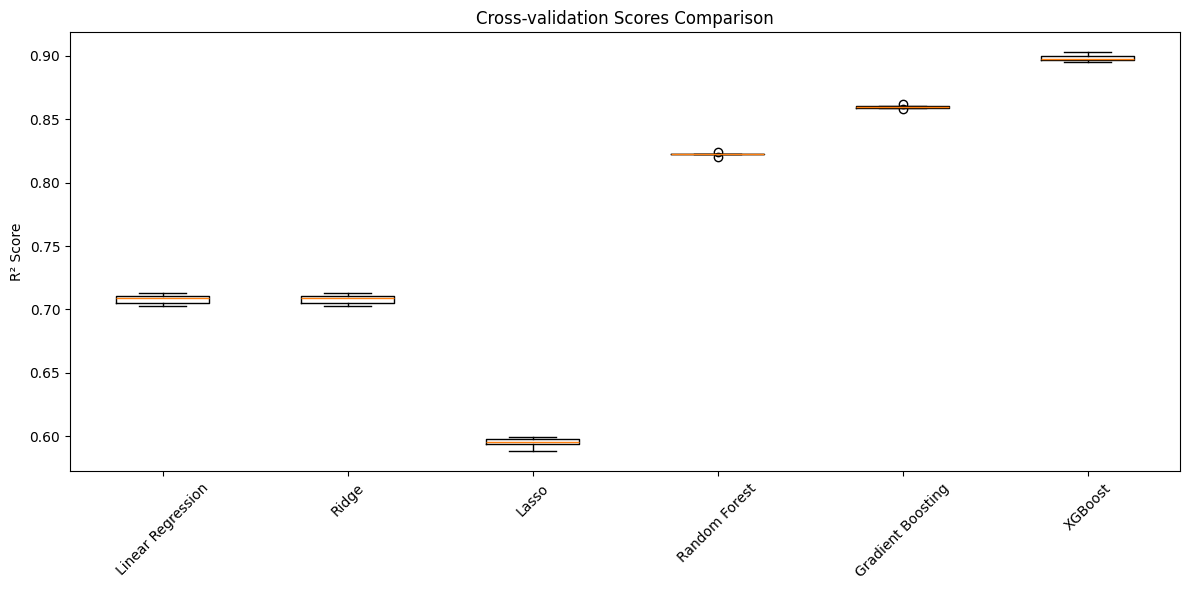


Best performing model: XGBoost


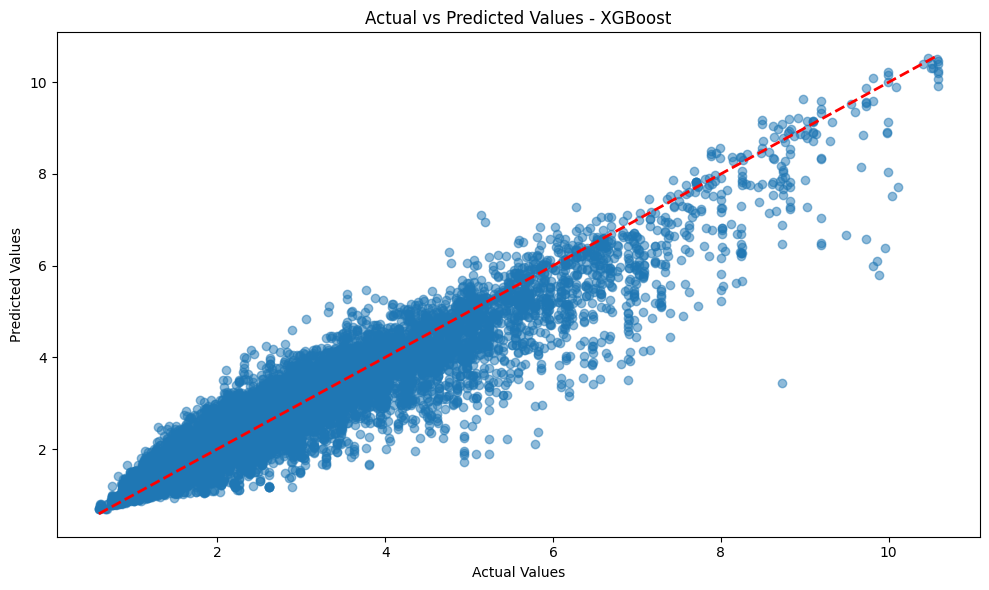

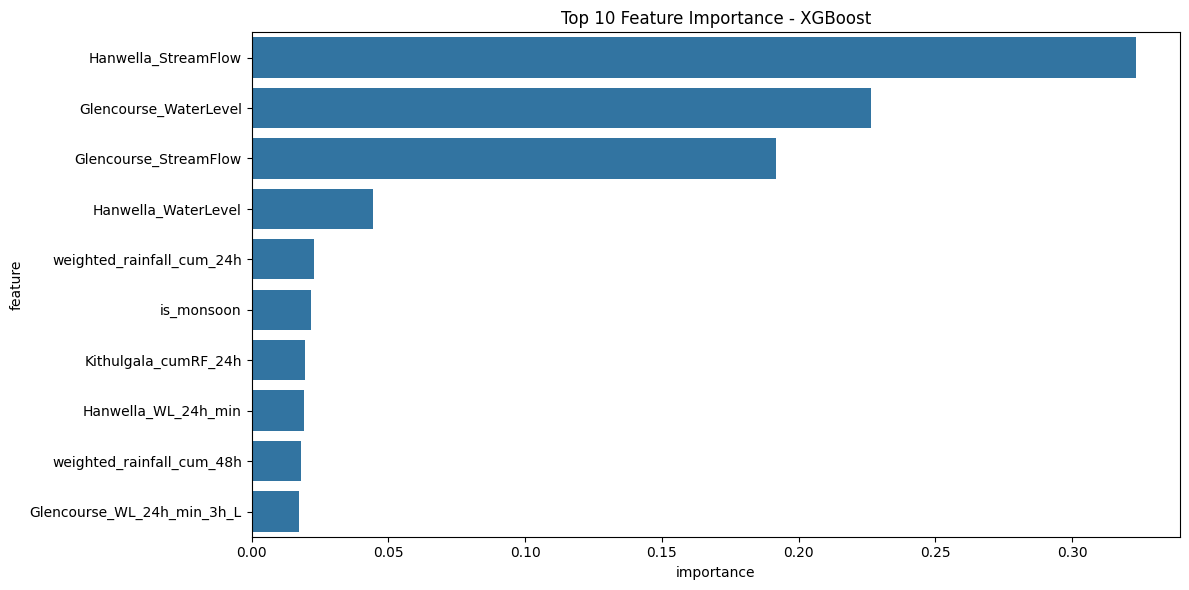

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# First, split the data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Define models with controlled parameters
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=300,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        n_jobs=-1,
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        min_samples_split=5,
        random_state=42
    ),
    'XGBoost': XGBRegressor(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        random_state=42
    )
}


# Enhanced evaluation function
def evaluate_model(y_true, y_pred, train_score, cv_scores):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    test_r2 = r2_score(y_true, y_pred)

    return {
        'RMSE': rmse,
        'MAE': mae,
        'Train R²': train_score,
        'Test R²': test_r2,
        'CV R² Mean': cv_scores.mean(),
        'CV R² Std': cv_scores.std()
    }


# Compare all models
results = []
cv_scores = {}

# Define cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\nEvaluating {name}...")

    # Perform cross-validation
    cv_score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    cv_scores[name] = cv_score

    # Fit model
    model.fit(X_train, y_train)

    # Get training score
    train_score = model.score(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate
    result = evaluate_model(y_test, y_pred, train_score, cv_score)
    results.append({'Model': name, **result})

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.set_index('Model')

# Print detailed results
print("\nDetailed Model Comparison:")
print(results_df.round(3))

# Visualize cross-validation results
plt.figure(figsize=(12, 6))
plt.boxplot([cv_scores[name] for name in cv_scores.keys()], labels=cv_scores.keys())
plt.title('Cross-validation Scores Comparison')
plt.xticks(rotation=45)
plt.ylabel('R² Score')
plt.tight_layout()
plt.show()

# Find best model based on CV R² Mean
best_model_name = results_df['CV R² Mean'].idxmax()
best_model = models[best_model_name]

print(f"\nBest performing model: {best_model_name}")

# Plot actual vs predicted for best model
plt.figure(figsize=(10, 6))
y_pred_best = best_model.predict(X_test)
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values - {best_model_name}')
plt.tight_layout()
plt.show()

# If best model is tree-based, show feature importance
if hasattr(best_model, 'feature_importances_'):
    # Get feature importance
    importances = pd.DataFrame({
        'feature': X_final.columns,
        'importance': best_model.feature_importances_
    })
    importances = importances.sort_values('importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=importances.head(10))
    plt.title(f'Top 10 Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()


# Model Overfitting Analysis

In [20]:
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=300,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        n_jobs=-1,
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        min_samples_split=5,
        random_state=42
    ),
    'XGBoost': XGBRegressor(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        random_state=42
    )
}

# Fit the models before calculating scores
for name, model in models.items():
    model.fit(X_train, y_train)  # Fit the model here

for name, model in models.items():
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"\n{name}:")
    print(f"Training R²: {train_score:.3f}")
    print(f"Testing R²: {test_score:.3f}")
    print(f"Difference: {(train_score - test_score):.3f}")


Random Forest:
Training R²: 0.847
Testing R²: 0.826
Difference: 0.020

Gradient Boosting:
Training R²: 0.883
Testing R²: 0.868
Difference: 0.015

XGBoost:
Training R²: 0.918
Testing R²: 0.902
Difference: 0.016


# **Training Final Models**


Evaluating Random Forest...

Evaluating XGBoost...

Final Model Performance Metrics:
               Train R²  Test R²   RMSE    MAE  CV R² Mean  CV R² Std
Model                                                                
Random Forest     0.866    0.846  0.603  0.390       0.839      0.001
XGBoost           0.938    0.914  0.450  0.289       0.906      0.001


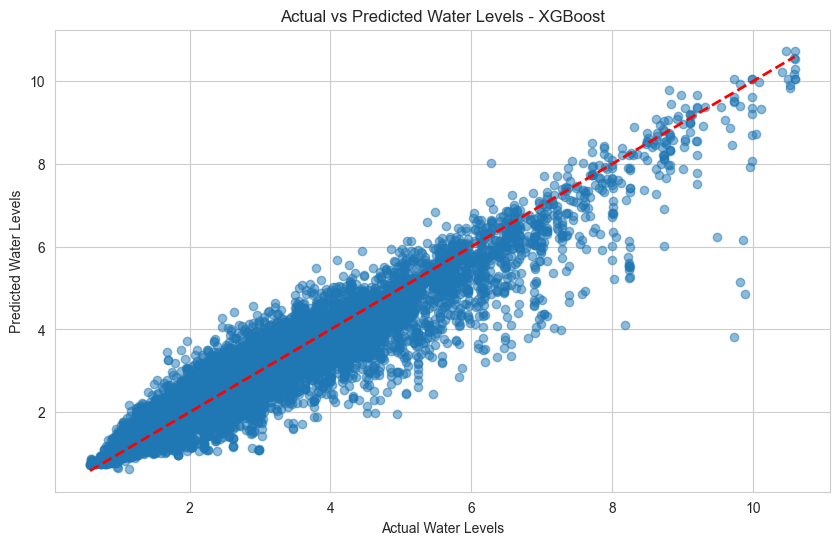

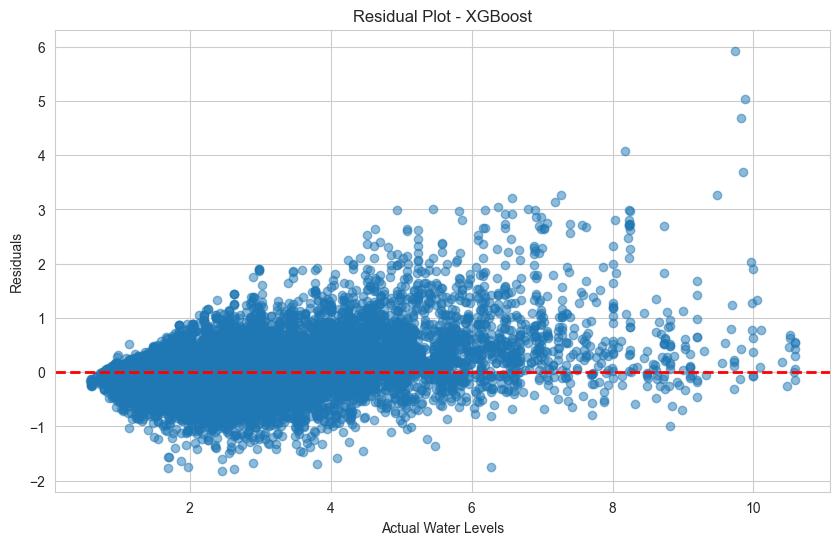

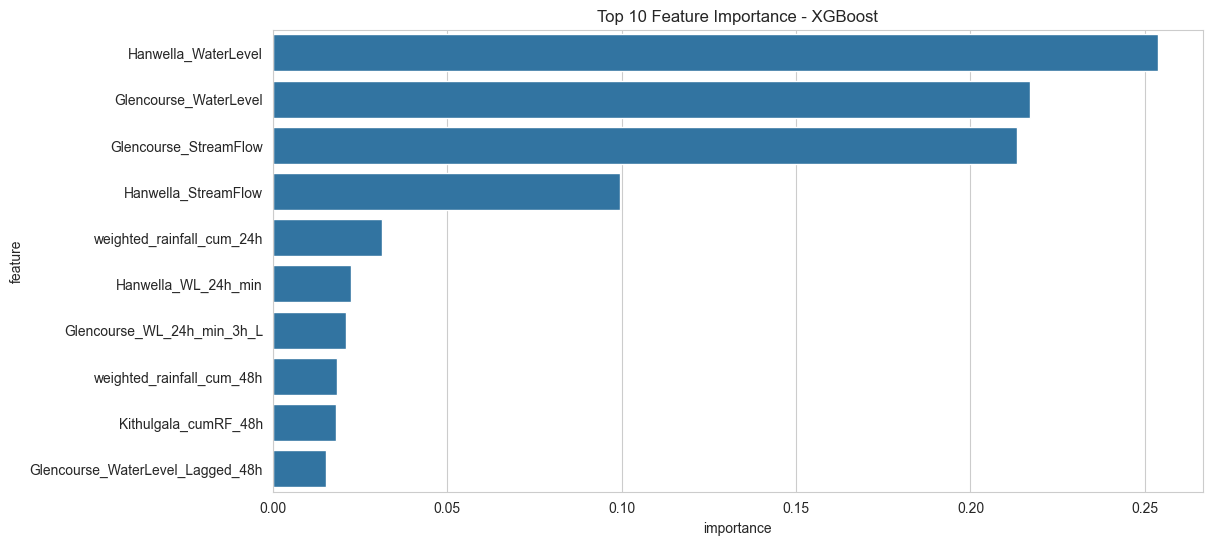


Insights and Practical Use:
- Best performing model: XGBoost
- The models provide predictions for flood risk in the Kelani River Basin.
- The best-performing model may be useful for early flood warnings.
- Further analysis on extreme weather events can improve accuracy.


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Define models with best parameters
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=500,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=2,
        max_features=None,
        random_state=42
    ),
    'XGBoost': XGBRegressor(
        subsample=0.9,
        n_estimators=300,
        max_depth=5,
        learning_rate=0.2,
        gamma=0.1,
        colsample_bytree=1.0,
        random_state=42
    )
}

# Evaluation function
def evaluate_model(y_true, y_pred, train_score, cv_scores):
    """
    Comprehensive model evaluation metrics

    Args:
    - y_true: Actual target values
    - y_pred: Predicted values
    - train_score: R² score on training data
    - cv_scores: Cross-validation scores

    Returns:
    - Dictionary of performance metrics
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    test_r2 = r2_score(y_true, y_pred)

    return {
        'Train R²': train_score,
        'Test R²': test_r2,
        'RMSE': rmse,
        'MAE': mae,
        'CV R² Mean': cv_scores.mean(),
        'CV R² Std': cv_scores.std()
    }

# Compare models
def compare_models():
    # Store results
    results = []
    trained_models = {}

    # Cross-validation setup
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in models.items():
        print(f"\nEvaluating {name}...")

        # Cross-validation
        cv_score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')

        # Fit model
        model.fit(X_train, y_train)
        train_score = model.score(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Evaluate
        result = evaluate_model(y_test, y_pred, train_score, cv_score)
        results.append({'Model': name, **result})

        # Store trained model
        trained_models[name] = model

    # Convert to DataFrame
    results_df = pd.DataFrame(results).set_index('Model')
    print("\nFinal Model Performance Metrics:")
    print(results_df.round(3))

    # Identify best model
    best_model_name = results_df['CV R² Mean'].idxmax()
    best_model = trained_models[best_model_name]
    y_pred_best = best_model.predict(X_test)

    # Visualizations
    # Actual vs Predicted Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_best, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Water Levels')
    plt.ylabel('Predicted Water Levels')
    plt.title(f'Actual vs Predicted Water Levels - {best_model_name}')
    plt.show()

    # Residual Plot
    residuals = y_test - y_pred_best
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, residuals, alpha=0.5)
    plt.axhline(0, color='r', linestyle='dashed', linewidth=2)
    plt.xlabel('Actual Water Levels')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot - {best_model_name}')
    plt.show()

    # Feature Importance for best model
    if hasattr(best_model, 'feature_importances_'):
        importances = pd.DataFrame({
            'feature': X_final.columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False)

        plt.figure(figsize=(12, 6))
        sns.barplot(x='importance', y='feature', data=importances.head(10))
        plt.title(f'Top 10 Feature Importance - {best_model_name}')
        plt.show()

    # Insights
    print("\nInsights and Practical Use:")
    print(f"- Best performing model: {best_model_name}")
    print("- The models provide predictions for flood risk in the Kelani River Basin.")
    print("- The best-performing model may be useful for early flood warnings.")
    print("- Further analysis on extreme weather events can improve accuracy.")

    return results_df, best_model

# Run the analysis
results_df, best_model = compare_models()

# Final Model Training and Prediction Pipeline